In [1]:
# reading data
import pandas as pd
data = pd.read_csv('Combined_files.csv',encoding='utf-8-sig')

In [2]:
data.head()

,source,review_id,user_name,review_description,rating,review_date,developer_response,developer_response_date
0,Google Play,d855686a-7ebe-4cef-911f-3d124bc2d61a,‫عمرو محمد (داود)‬‎,very good,5,2023-01-04 15:47:27,We sincerely thank you for taking the time to ...,2023-01-04 21:06:38
1,Google Play,0491e3b8-c262-4ef3-ab74-4a962a7a28ee,Moath Tobasi,ارمكس برنامج ممتاز لا يوجد اي تعليق المواعيد ف...,5,2023-01-04 15:46:03,سعيدين بخدمتك وشكراً لتقييمك نتطلع لخدمتك مستق...,2023-01-04 15:12:31
2,Google Play,0b537bf6-2dc3-4d4b-b239-6e6b916eaadc,Mohamed Mohamedy,فوق الممتاز,5,2023-01-04 14:07:14,سعيدين بخدمتك وشكراً لتقييمك نتطلع لخدمتك مستق...,2023-01-04 19:51:33
3,Google Play,5e50884e-e69a-4d05-8ae3-0b0aea7f278c,temoo tamam,خدمة سيئة جدا وعدم الالتزام بمواعيد التسليم وخ...,1,2023-01-04 13:52:23,مرحباً، عذراً منك على ذلك! نود الحصول على تفاص...,2023-01-04 19:30:51
4,Google Play,c29dbb95-8dfa-4918-94ca-5e124d405930,tufool mab,شكرا على حسن تعاونكم معنا,5,2023-01-04 06:42:33,يسرنا سماع ذلك، ونتمنى أن نكون عند حسن ظنك دائ...,2023-01-04 15:50:52


In [3]:
data.shape

(740349, 8)

In [4]:
# check missing values
data.isna().sum()

source                          0
review_id                       0
user_name                       3
review_description            727
rating                          0
review_date                     0
developer_response         455381
developer_response_date    455381
dtype: int64

#viulastion

<AxesSubplot:>

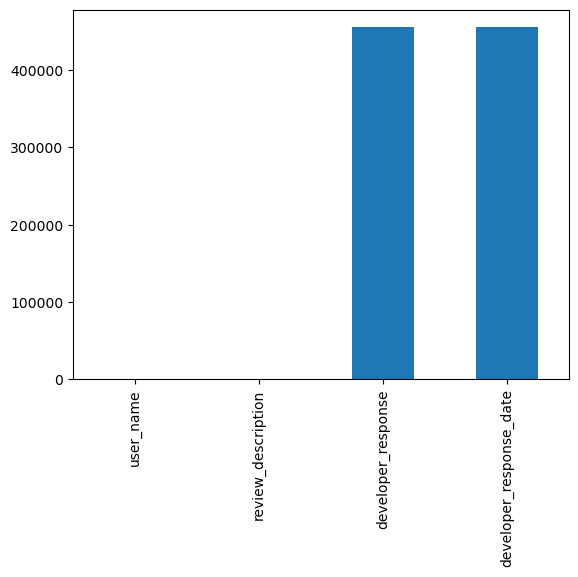

In [5]:
# sum of future have row is null
data.isna().sum()[data.isna().sum()>0].plot(kind='bar')

In [6]:
#remove null row
df = data.dropna(how='any',axis=0 ) .reset_index(drop=True)
#df.head()
#del data

In [7]:
# check data shape befor drop row null
df.shape

(284956, 8)

# Text Preprocessing

This is where all text cleaning takes place. It’s a loop that iterates through all 5,572 documents and does the following:

    Remove all special characters
    Lowercase all the words
    Tokenize
    Remove stopwords
    Lemmatize


In [8]:
#cleaning emjo from data

In [9]:
import re
def remove_emojis(data):
    emoj = re.compile("["
                           u"\U0001F600-\U0001F64F" #emotions
                           u"\U0001F300-\U0001F5FF" #sumbols and pictographs
                           u"\U0001F680-\U0001F6FF" #transport and map symbols
                           u"\U0001F1E0-\U0001F1FF" #flags
                           u"\U00002702-\U000027B0"  
                           u"\U000024C2-\U0001F251" 

                           "]+",flags = re.UNICODE)

    return re.sub(emoj, '', data)

In [10]:
for i in range(len(df)):    
    #print( i , data.iloc[i, 6])
    df.iloc[i,6] = remove_emojis(df.iloc[i,6])
    
#     if i == 30 :
#         break

In [11]:
# check missing values
df.isna().sum()

source                     0
review_id                  0
user_name                  0
review_description         0
rating                     0
review_date                0
developer_response         0
developer_response_date    0
dtype: int64

In [12]:
df.shape

(284956, 8)

### Clean/Normalize Arabic Text

In [13]:
import gensim
import re
# Clean/Normalize Arabic Text
def clean_str(text):
    search = ["أ","إ","آ","ة","_","-","/",".","،"," و "," يا ",'"',"ـ","'","ى","\\",'\n', '\t','&quot;','?','؟','!']
    replace = ["ا","ا","ا","ه"," "," ","","",""," و"," يا","","","","ي","",' ', ' ',' ',' ? ',' ؟ ',' ! ']
    
    #remove tashkeel
    p_tashkeel = re.compile(r'[\u0617-\u061A\u064B-\u0652]')
    text = re.sub(p_tashkeel,"", text)
    
    #remove longation
    p_longation = re.compile(r'(.)\1+')
    subst = r"\1\1"
    text = re.sub(p_longation, subst, text)
    
    text = text.replace('وو', 'و')
    text = text.replace('يي', 'ي')
    text = text.replace('اا', 'ا')
    for i in range(0, len(search)):
        text = text.replace(search[i], replace[i])    
        
    #trim    
    text = text.strip()

    return text

In [14]:
for i in range(len(df)):    
    df.iloc[i,6] = clean_str(df.iloc[i,6])

### remove if developer_response if data less two leater

In [15]:
listIndex = []
for i in range(len(df)):
    #ww = df.loc[i,"developer_response"] 
    ww = df.iloc[i,6] 
    if len (ww) <= 2  or not ww.strip():
        #print( i , df.iloc[i, 6])        
        listIndex.append(i)

In [16]:
print (len (listIndex))
print (listIndex)

1121
[9114, 9116, 9124, 9139, 9146, 9149, 9152, 9154, 9156, 9159, 9160, 9163, 9165, 9167, 9168, 9170, 9171, 9172, 9174, 9176, 9178, 9181, 9182, 9183, 9184, 9186, 9188, 9189, 9190, 9191, 9192, 9193, 9194, 9196, 9197, 9198, 9976, 10632, 10648, 10780, 10858, 10867, 11101, 25556, 40014, 40019, 40024, 40978, 40987, 41007, 41062, 41070, 41092, 41107, 41115, 41128, 41140, 41153, 41161, 41179, 41184, 41205, 41221, 41233, 41245, 41249, 41251, 41275, 41277, 41294, 41345, 41347, 41413, 41449, 41563, 41577, 41585, 41613, 41619, 41630, 41652, 41653, 41657, 41723, 41798, 41847, 41849, 41864, 41877, 41893, 41898, 41910, 41975, 41999, 42017, 42037, 42051, 42056, 42097, 42098, 42116, 42146, 42168, 42179, 42220, 42227, 42300, 42304, 42320, 42325, 42327, 42333, 42342, 42350, 42356, 42357, 42367, 42428, 42448, 42526, 42534, 42543, 42608, 42620, 42634, 42670, 42677, 42692, 42716, 42724, 42728, 42775, 42776, 42778, 42830, 42863, 42873, 42897, 42910, 43045, 43163, 43173, 43295, 43707, 43730, 43893, 43913, 43

In [17]:
df_new = df.drop(listIndex)

df_new.set_axis(range(len(df_new)), inplace=True)

df_new.shape

del df

In [18]:
df_new.to_csv("data_cleaning.csv", encoding='utf-8-sig', index=False , header=True)

### search for repeat sentnecte and count to map

In [19]:
# # create a list text
text = list(df_new['developer_response'])
text [:10]

['We sincerely thank you for taking the time to rate us',
 'سعيدين بخدمتك وشكرا لتقيمك نتطلع لخدمتك مستقبلا',
 'سعيدين بخدمتك وشكرا لتقيمك نتطلع لخدمتك مستقبلا',
 'مرحبا عذرا منك علي ذلك !  نود الحصول علي تفاصيل اكثر للتحقق يرجي تزويدنا بتفاصيل ما حصل علي الرابط التالي للنظر في الامر GlobalCareCenter@aramexcom',
 'يسرنا سماع ذلك ونتمني ان نكون عند حسن ظنك دائما وان نقدم خدمه تليق بكم شكرا جزيلا',
 'مرحبا محمد عذرا منك علي ذلك !  نود الحصول علي تفاصيل اكثر للتحقق يرجي تزويدنا بتفاصيل ما حصل علي الرابط التالي للنظر في الامر GlobalCareCenter@aramexcom',
 'مرحبا يسعدنا سماع ذلك وهدفنا الاول ارضاؤكم شكرا',
 'مرحبا اشرف يسرنا سماع ذلك ونتمني ان نكون عند حسن ظنك دائما وان نقدم خدمه تليق بكم شكرا جزيلا',
 'مرحبا عمار يسرنا سماع ذلك ونتمني ان نكون عند حسن ظنك دائما وان نقدم خدمه تليق بكم شكرا جزيلا',
 'مرحبا توم يسرنا سماع ذلك ونتمني ان نكون عند حسن ظنك دائما وان نقدم خدمه تليق بكم شكرا جزيلا']

In [20]:
#search for frequencies sentnecte and count to map
mp = dict()

def count(arr, n):    
    # Traverse through array elements
    # and count frequencies
    for i in range(n):
        if arr[i] in mp.keys():
            mp[arr[i]] += 1
        else:
            mp[arr[i]] = 1

n = len(text) 
print (n)
count(text, n)

283835


In [21]:
#convert map to dataframe
df_search = pd.DataFrame(mp.items(), columns=['developer_response', 'Count'])

In [22]:
print (df_search.shape)
df_search.head()

(52756, 2)


,developer_response,Count
0,We sincerely thank you for taking the time to ...,1
1,سعيدين بخدمتك وشكرا لتقيمك نتطلع لخدمتك مستقبلا,3
2,مرحبا عذرا منك علي ذلك ! نود الحصول علي تفاصي...,4
3,يسرنا سماع ذلك ونتمني ان نكون عند حسن ظنك دائم...,2
4,مرحبا محمد عذرا منك علي ذلك ! نود الحصول علي ...,3


In [23]:
#save all data and  frequencies
#df_search.to_csv("data_repeat_all.csv", encoding='utf-8-sig', index=False , header=True)

In [24]:
#collect data that have frequencies bigger (1)
df_search_repeat = df_search[df_search.Count != 1]

print (df_search_repeat.shape)
df_search_repeat.head(10)

(9190, 2)


,developer_response,Count
1,سعيدين بخدمتك وشكرا لتقيمك نتطلع لخدمتك مستقبلا,3
2,مرحبا عذرا منك علي ذلك ! نود الحصول علي تفاصي...,4
3,يسرنا سماع ذلك ونتمني ان نكون عند حسن ظنك دائم...,2
4,مرحبا محمد عذرا منك علي ذلك ! نود الحصول علي ...,3
9,مرحبا سعدنا بخدمتك ! نقدر لك وقتك لمشاركه تجر...,229
10,شكرا ! يسعدنا سماع ذلك,100
11,مرحبا امل شكرا ! يسعدنا سماع ذلك,2
12,يسعدنا سماع ذلك ودائما سعداء لخدمتك شكرا,3
13,We do appreciate your effort in taking out tim...,19
20,مرحبا فاديسعدنا بخدمتك ! نقدر لك وقتك لمشاركه...,2


In [25]:
#save data to csv file after cleaning data
df_search_repeat.to_csv("df_search_repeat.csv", encoding='utf-8-sig', index=False , header=True)

In [26]:
#collect data that have frequencies equal (1)
df_search_not_repeat = df_search[df_search.Count == 1]

print (df_search_not_repeat.shape)
df_search_not_repeat.head(10)

(43566, 2)


,developer_response,Count
0,We sincerely thank you for taking the time to ...,1
5,مرحبا يسعدنا سماع ذلك وهدفنا الاول ارضاؤكم شكرا,1
6,مرحبا اشرف يسرنا سماع ذلك ونتمني ان نكون عند ح...,1
7,مرحبا عمار يسرنا سماع ذلك ونتمني ان نكون عند ح...,1
8,مرحبا توم يسرنا سماع ذلك ونتمني ان نكون عند حس...,1
14,مرحبا عبدالعزيز يسعدنا سماع ذلك وهدفنا الاول ا...,1
15,مرحبا مدثر يسعدنا سماع ذلك وهدفنا الاول ارضاؤك...,1
16,مرحبا ميسر يسعدنا سماع ذلك وهدفنا الاول ارضاؤك...,1
17,مرحبا محمد يسعدنا سماع ذلك وهدفنا الاول ارضاؤك...,1
18,مرحبا قتيبه سعدنا بخدمتك ! نقدر لك وقتك لمشار...,1


In [27]:
df_search_not_repeat.to_csv("df_search_not_repeat.csv", encoding='utf-8-sig', index=False , header=True)

In [28]:
df_new.shape

(283835, 8)